In [35]:
# Вариант 15
# Функция: z = x * sin(y)  
# Ограничения: x(-p<=x<=p) y(-p<=y<=p) z(-3<=z<=3)

In [36]:
!pip install -U scikit-fuzzy

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import math
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tabulate import tabulate
from numpy.random import randint
from random import random as rnd
from random import gauss, randrange

In [38]:
X_START = -math.pi
X_END = math.pi
Y_START = -math.pi
Y_END = math.pi
Z_START = -3
Z_END = 3

In [39]:
TERMS = 5

MUTATION_GENS_QUANTITY = 2
STEPS_NUMBER = 10
POPULATION_SIZE = 10
DECIMAL_PLACES = 3
GENES_NUMBER = 3

In [40]:
X_STEP = (abs(X_START) + abs(X_END)) / TERMS
Y_STEP = (abs(Y_START) + abs(Y_END)) / TERMS
Z_STEP = (abs(Z_START) + abs(Z_END)) / TERMS

X = np.arange(X_START, X_END + X_STEP, X_STEP)
Y = np.arange(Y_START, Y_END + Y_STEP, Y_STEP)
Z = np.arange(Z_START, Z_END + Z_STEP, Z_STEP)

X_mesh, Y_mesh = np.meshgrid(X, Y)
Z_mesh = Y_mesh * np.sin(X_mesh + Y_mesh)

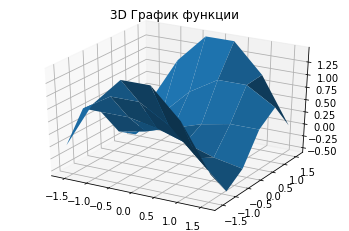

In [41]:
fix, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X_mesh, Y_mesh, Z_mesh)
ax.set_zlim()
plt.title('3D График функции')
plt.show(Z_START, Z_END)

In [42]:
def ranges(start, end, termsNum, variable):
    ranges = [None] * termsNum
    step = (abs(start) + abs(end)) / (termsNum - 1)

    label = "Функция принадлежности {} при {} термах".format(variable, termsNum)
    graph = ctrl.Antecedent(np.arange(start, end + step, step), label)

    for i in np.arange(0, termsNum, 1):
        triangle = []
        ranges[i] = {}

        if i == 0:
            triangle = [start, start, start + step]
            ranges[i]['start'] = triangle[1]
            ranges[i]['end'] = triangle[2] - (step / 2)
            ranges[i]['mid'] = triangle[1]
        else:
            triangle = [
                (i - 1) * step - abs(start),
                i * step - abs(start),
                (i + 1) * step - abs(start)
            ]
            if termsNum - 1 == i:
                ranges[i]['start'] = triangle[0] + (step / 2)
                ranges[i]['end'] = triangle[1]
                ranges[i]['mid'] = triangle[1]
            else:
                ranges[i]['start'] = triangle[0] + (step / 2)
                ranges[i]['end'] = triangle[2] - (step / 2)
                ranges[i]['mid'] = triangle[1]
        graph[i] = fuzz.trimf(graph.universe, triangle)
    graph.view()
    return ranges

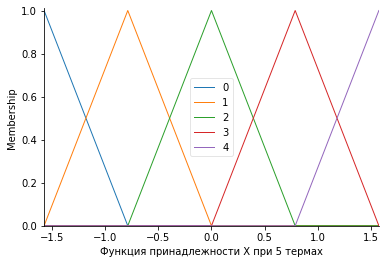

In [43]:
X_RANGES = ranges(X[0], X[-1], TERMS, 'Х')

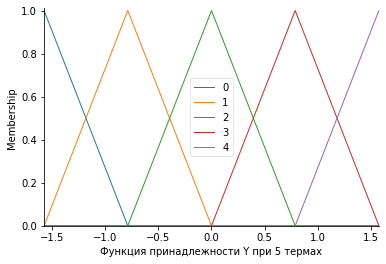

In [44]:
Y_RANGES = ranges(Y[0], Y[-1], TERMS, 'Y')

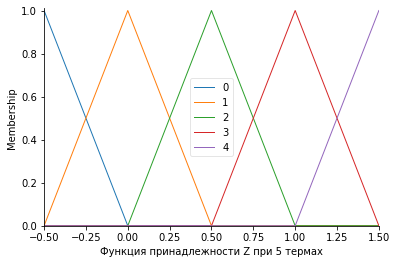

In [45]:
Z_RANGES = ranges(Z[0], Z[-1], TERMS, 'Z')

In [46]:
tableHeader = ['№', '1', '2', '3']
tableVariables = []

for i in range(TERMS):
    tableVariables.append([i + 1, X_RANGES[i]['start'], X_RANGES[i]['mid'], X_RANGES[i]['end']])

print('Параметры функции принадлежности:')
print(tabulate(tableVariables, tableHeader))

Параметры функции принадлежности:
  №          1          2          3
---  ---------  ---------  ---------
  1  -1.5708    -1.5708    -1.1781
  2  -1.1781    -0.785398  -0.392699
  3  -0.392699   0          0.392699
  4   0.392699   0.785398   1.1781
  5   1.1781     1.5708     1.5708


In [47]:
chromosomeFirst = []
chromosomeFirst.insert(0, 0)
for i in range(TERMS):
    for j in range(GENES_NUMBER):
        chromosomeFirst.append(round(tableVariables[i][j + 1], DECIMAL_PLACES))

print(chromosomeFirst)

[0, -1.571, -1.571, -1.178, -1.178, -0.785, -0.393, -0.393, 0.0, 0.393, 0.393, 0.785, 1.178, 1.178, 1.571, 1.571]


In [48]:
def createChromosome():
    chromosome = []
    chromosome.insert(0, 0)

    limitEnd = X_END
    limitStart = X_START
    distanceFull = round((abs(limitEnd) + abs(limitStart)), DECIMAL_PLACES)
    distanceDiff = round((distanceFull / GENES_NUMBER), DECIMAL_PLACES)

    for i in range(GENES_NUMBER):
        randomVal = round((rnd() * distanceDiff), DECIMAL_PLACES)
        gen = round((round(limitStart, DECIMAL_PLACES) + (i * distanceDiff) + randomVal), DECIMAL_PLACES)
        chromosome.append(gen)

    return chromosome

In [49]:
def createPopulation():
    population = [createChromosome() for i in range(POPULATION_SIZE)]
    populationReturn = [chromosomeFirst]
    for i in range(len(population)):
        populationReturn.append(population[i])
    populationReturn.pop(0)
    return populationReturn

In [50]:
def crossing(parentFirst, parentSecond):
    randVal = randint(1, len(parentFirst))
    offspring = [ parentFirst[0:randVal] + parentSecond[randVal:] ]
    offspring.append(parentSecond[0:randVal] + parentFirst[randVal:])
    return offspring

In [51]:
def checkPopulationOffspring(offspring):
    isNormalOffspring = False
    for i in range(len(offspring) - 1):
        if offspring[i] <= offspring[i + 1]:
            isNormalOffspring = True
        else:
            isNormalOffspring = False
    return isNormalOffspring

In [52]:
def checkOffspring(offspring):
    if checkPopulationOffspring(offspring[0]) and checkPopulationOffspring(offspring[1]):
        return True
    return False

In [53]:
def createRandomIndexes(chromosome):
    randomIndexes = []
    for i in range(GENES_NUMBER):
        randomIndexes.append(randint(0, GENES_NUMBER - 1))

    return randomIndexes

In [54]:
def mutationMultipoint(chromosome):
    randomIndexes = createRandomIndexes(chromosome)
    for i in range(MUTATION_GENS_QUANTITY):
        index = randomIndexes[i]
        limitEnd = chromosome[index + 1]
        limitStart = chromosome[randomIndexes[i] - 1]
        chromosome[randomIndexes[i]] = round((rnd() * (limitEnd - limitStart) + abs(limitStart)), DECIMAL_PLACES)
    return chromosome

In [55]:
def mutation(population):
    populationMutated = []
    for i in range(len(population)):
        populationMutated.append(mutationMultipoint(population[i]))
    return populationMutated

In [56]:
def calculateSKOError(chromosome):
    SKO = 0
    skoSum = 0

    chromosomeRefernce = []
    for i in range(TERMS):
        for j in range(GENES_NUMBER):
            chromosomeRefernce.append(round(tableVariables[i][j + 1], DECIMAL_PLACES))

    for i in range(len(chromosome)):
        skoSum += np.power((chromosomeRefernce[i] - chromosome[i]), 2)

    return math.sqrt(skoSum / len(chromosomeRefernce))

In [57]:
def calculateError(population):
    for i in range(len(population)):
        population[i].pop(0)
        skoError = calculateSKOError(population[i])
        population[i].insert(0, skoError)
    return population

In [58]:
def selection(pastPopulation, offspring):
    pastPopulationError = calculateError(pastPopulation)

    for i in range(len(offspring)):
        errorMax = pastPopulationError[0][0]
        index = 0

        for j in range(len(pastPopulationError) - 1):
            if errorMax < pastPopulationError[j + 1][0]:
                errorMax = pastPopulationError[j + 1][0]
                index = j

        pastPopulationError[index] = offspring[i]

    return pastPopulationError

In [59]:
def findMinErrorInPopulation(population):
    errorMin = population[0]
    for i in range(len(population) - 1):
        if population[i][0] > population[i + 1][0]:
            errorMin = population[i + 1]
    del errorMin[0]
    return errorMin

In [60]:
population = createPopulation()
print("Популяция: ", population)

Популяция:  [[0, -0.568, -0.464, 0.926], [0, -1.282, -0.168, 0.832], [0, -0.73, -0.42, 0.993], [0, -0.695, -0.206, 1.211], [0, -0.799, -0.397, 1.057], [0, -1.046, 0.371, 1.439], [0, -0.833, -0.494, 1.185], [0, -1.241, 0.115, 1.438], [0, -0.669, -0.446, 0.752], [0, -1.062, 0.095, 1.312]]


In [61]:
for i in range(STEPS_NUMBER):
    print("Шаг №", i + 1)

    parentFirst = population[0]
    parentSecond = population[randint(1, len(population))]
    print("Первый родитель: ", parentFirst)
    print("Второй родитель: ", parentSecond)

    offspring = crossing(parentFirst, parentSecond)
    while not checkOffspring(offspring):
        offspring = crossing(parentFirst, parentSecond)
    print("Результат скрещивания: ", offspring)

    offspringMutated = mutation(offspring)
    print("Результат мутации: ", offspringMutated)

    population = selection(population, offspringMutated)
    print("Результат селекции: ", population)
    print("")

Шаг № 1
Первый родитель:  [0, -0.568, -0.464, 0.926]
Второй родитель:  [0, -0.695, -0.206, 1.211]
Результат скрещивания:  [[0, -0.568, -0.464, 1.211], [0, -0.695, -0.206, 0.926]]
Результат мутации:  [[-0.441, 0.434, -0.464, 1.211], [-0.276, 0.28, -0.206, 0.926]]
Результат селекции:  [[0.6662469011810361, -0.568, -0.464, 0.926], [0.6372874809168413, -1.282, -0.168, 0.832], [0.6705879509803319, -0.73, -0.42, 0.993], [0.745561175670157, -0.695, -0.206, 1.211], [-0.276, 0.28, -0.206, 0.926], [0.8522784365061299, -1.046, 0.371, 1.439], [0.6970577211871817, -0.833, -0.494, 1.185], [0.8080821740392495, -1.241, 0.115, 1.438], [0.6220465684603793, -0.669, -0.446, 0.752], [0.7846331202118181, -1.062, 0.095, 1.312]]
Шаг № 2
Первый родитель:  [0.6662469011810361, -0.568, -0.464, 0.926]
Второй родитель:  [0.6372874809168413, -1.282, -0.168, 0.832]
Результат скрещивания:  [[0.6662469011810361, -0.568, -0.464, 0.832], [0.6372874809168413, -1.282, -0.168, 0.926]]
Результат мутации:  [[0.757, -0.35, -0

In [62]:
best = findMinErrorInPopulation(population)
print("Оптимальное решение: ", best)

Оптимальное решение:  [-0.669, -0.446, 0.752]
